In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('finished_processed.csv')
dataset.drop(['usd_pledged', 'state', 'is_starrable', 'disable_communication'], axis=1, inplace=True)

target = dataset['backers_count']
features = dataset.drop(['backers_count'], axis=1)
print(features.keys())

Index(['category', 'country', 'creator', 'currency', 'goal', 'staff_pick',
       'location', 'blurb_length', 'duration'],
      dtype='object')


In [3]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=1)


In [7]:
forest_regressor = RandomForestRegressor(n_estimators = 200, max_features = None, oob_score = True, random_state = 1,
                                      warm_start = True, n_jobs = -1)
forest_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=True, random_state=1, verbose=0, warm_start=True)

In [11]:
from sklearn.metrics import r2_score

predicted_test = forest_regressor.predict(X_test)
forest_regressor.score(X_test, y_test)

0.21195477905616933

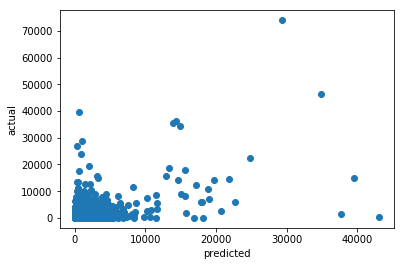

In [9]:
plt.xlabel('predicted')
plt.ylabel('actual')
plt.scatter(predicted_test, y_test)